In [537]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')#임포트 해주면 그래프 그릴때 무시해도 되는 오류 안뜸!

In [538]:
#데이터 분석 과정
##주제 -- 수집 -- 전처리 --EDA -- 예측시스템(회귀(수치예측),분류) -- 실제예측 -- 시각화/서비스구현
## y = ax + b ,a는 기울기 , b는 y절편, x는 변수 값
## y = ax1 + cx2 + dx3 + b
## y는 죽은것인가/살것인가에 대한 결과 예측 값
## x1, x2, x3가 결과를 결정하는 변수들
## => age, pclass, alone등이 x(변수)가 된다.


In [539]:
raw_data = pd.read_excel('../csv-data/titanic.xls')
raw_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [540]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [541]:
raw_data.describe()#수치데이터 분석 하는 함수: describe

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [542]:
svc = raw_data['survived'].value_counts()
svc

0    809
1    500
Name: survived, dtype: int64

In [543]:
svc.index=['death','alived']#인덱스로 잡아놓으면 아래 파이차트 그릴때 퍼센트에 index의 텍스트가 함께 나온다.

In [544]:
type(svc)#인덱스와 values의 결합

pandas.core.series.Series

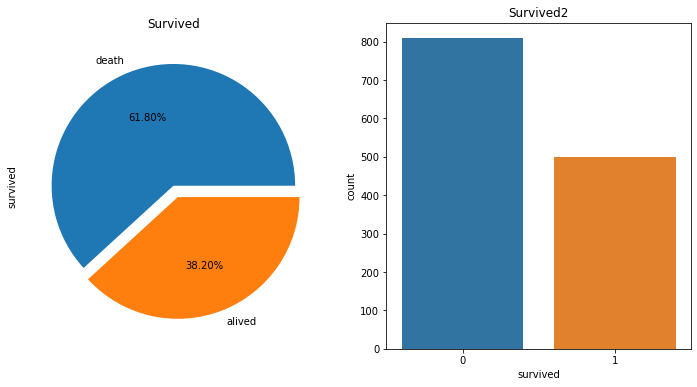

In [545]:
# f,ax=plt.subplots(1,2,figsize=(12,6))

# raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],#explode간격
#                                              autopct='%1.2f%%',ax=ax[0])
# ax[0].set_title('Survived')
# ax[0].set_ylabel('')

# sns.countplot('survived', data=raw_data,ax=ax[1])
# ax[1].set_title('Survived')
# plt.show()

# f, ax = plt.subplots(1,2,figsize=(12,6))

# raw_data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct ='%1.2f%%' ,ax=ax[0])#,ax=ax[0]첫번째 축
# ax[0].set_title('Survived')

# sns.countplot('survived',data=raw_data,ax=ax[1])
# ax[1].set_title('Survived')
# plt.show()


f,ax=plt.subplots(1,2,figsize=(12,6))

svc.plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])

ax[0].set_title('Survived')

sns.countplot('survived', data=raw_data, ax = ax[1])
ax[1].set_title('Survived2')
plt.show()

In [546]:
#age의 분포를 그려보세요
#pclass별 평균
#변수들간의 상관도
#heatmap

In [547]:
#age의 분포를 그려보세요
raw_data['age'].value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: age, Length: 98, dtype: int64

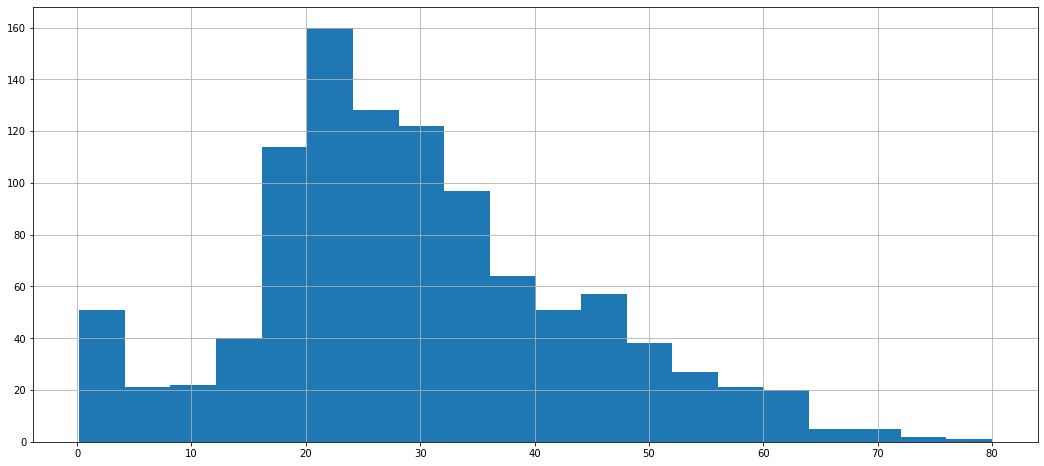

In [548]:
raw_data['age'].hist(bins=20,figsize=(18,8));

In [549]:
#pclass별 평균

In [550]:
raw_data.groupby(by='pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [551]:
raw_data_pclass = raw_data['pclass'].value_counts()
raw_data_pclass

3    709
1    323
2    277
Name: pclass, dtype: int64

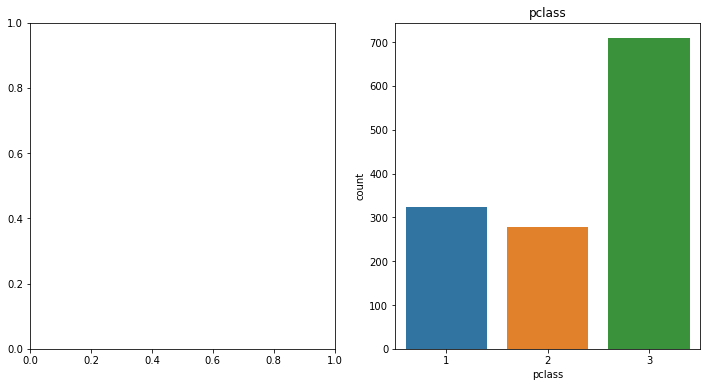

In [552]:

f, ax = plt.subplots(1,2,figsize=(12,6))

#raw_data['pclass'].value_counts().plot.pie(explode=[0.1,0.1], autopct ='%1.2f%%' ,ax=ax[0])#,ax=ax[0]첫번째 축
#ax[0].set_title('pclass')

sns.countplot('pclass',data=raw_data,ax=ax[1])
ax[1].set_title('pclass')
plt.show()

In [553]:
#변수들간의 상관도
rd_corr = raw_data.corr()
rd_corr

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


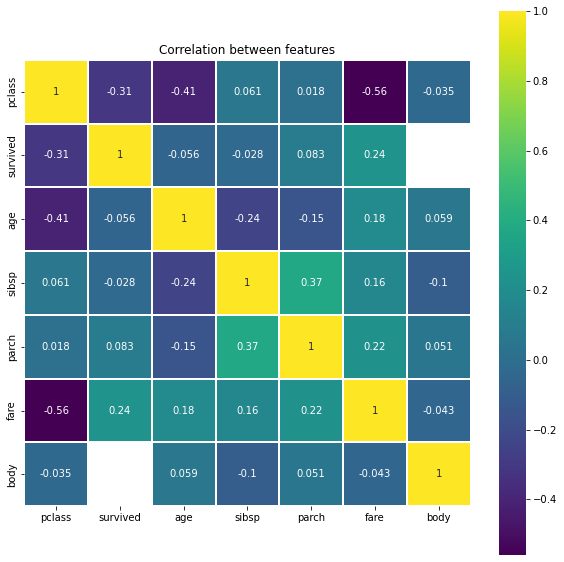

In [554]:
plt.figure(figsize=(10, 10))
sns.heatmap(rd_corr, linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [555]:
sex_survived=raw_data.groupby(by='sex').mean()
sex_survived

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


In [556]:
#성별 카운트#성별로 생사인원
sec = raw_data['sex'].value_counts()
sec

male      843
female    466
Name: sex, dtype: int64

In [557]:
sex_alive = raw_data.groupby(by='sex')['survived'].sum()
print(sex_alive)
list_sa = list(sex_alive)

sex
female    339
male      161
Name: survived, dtype: int64


In [558]:
list_sa.reverse()

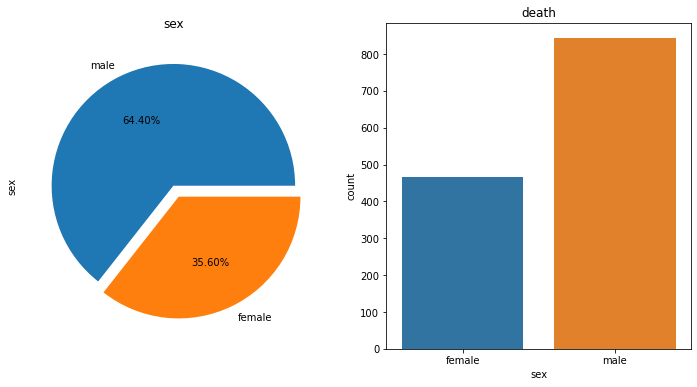

In [559]:

f, ax = plt.subplots(1,2,figsize=(12,6))

sec.plot.pie(explode=[0,0.1], autopct ='%1.2f%%' ,ax=ax[0])#,ax=ax[0]첫번째 축
ax[0].set_title('sex')

sns.countplot('sex',data=raw_data, ax=ax[1])
ax[1].set_title('death')
plt.show()




In [560]:
# 성별 카운트
rd_sex = raw_data['sex'].value_counts()
rd_sex

male      843
female    466
Name: sex, dtype: int64

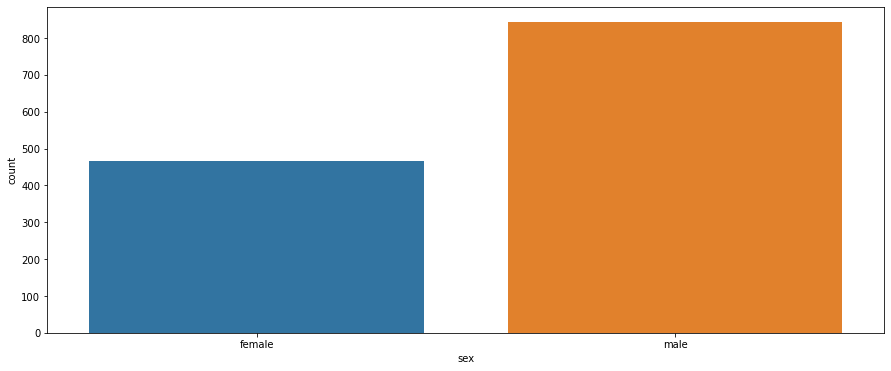

In [561]:
plt.figure(figsize=(15,6))
sns.countplot('sex', data=raw_data)
plt.show()

In [562]:
## 나이대별 값의 범위가 너무 많아서 범위를 묶기로 함.
raw_data['age_cat'] = pd.cut(raw_data['age'],
                                            bins = [0, 20, 35, 55, 100],
                                            include_lowest=True,
                                            labels= ['children','young','adult','old']
                            )
raw_data['age_cat'][:5]

0       young
1    children
2    children
3       young
4       young
Name: age_cat, dtype: category
Categories (4, object): ['children' < 'young' < 'adult' < 'old']

In [563]:
# 성별 생사인원 구해보고, 그래프로 그려보세요!
sex_alive = raw_data.groupby(by='sex')['survived'].sum() #1을 다 더하면, 생존인원이 될 것임.
print(sex_alive)
list_sa = list(sex_alive)
list_sa.reverse()
list_sa ##생존인원

sex
female    339
male      161
Name: survived, dtype: int64


[161, 339]

In [564]:
print(rd_sex) #탑승인원
rd_sex_list = list(rd_sex)
rd_sex_list

male      843
female    466
Name: sex, dtype: int64


[843, 466]

In [565]:
for i in range(2):
    print(rd_sex.index[i])
    print('생존인원: ',list_sa[i], ' <-> 탑승인원: ',  rd_sex_list[i])
    print('----------------------------------------')

male
생존인원:  161  <-> 탑승인원:  843
----------------------------------------
female
생존인원:  339  <-> 탑승인원:  466
----------------------------------------


In [566]:
sex_df = pd.DataFrame({'alive' : list_sa, 'board' : rd_sex_list}, index=['male', 'female'])
sex_df

,alive,board
male,161,843
female,339,466


In [567]:
dead_result = sex_df['board'] - sex_df['alive']
dead_result

male      682
female    127
dtype: int64

In [568]:
dead_result.index = ['male', 'female']
dead_result

male      682
female    127
dtype: int64

In [569]:
sex_df.reset_index(inplace=True)#인덱스 리셋
sex_df

,index,alive,board
0,male,161,843
1,female,339,466


<AxesSubplot:xlabel='index', ylabel='alive'>

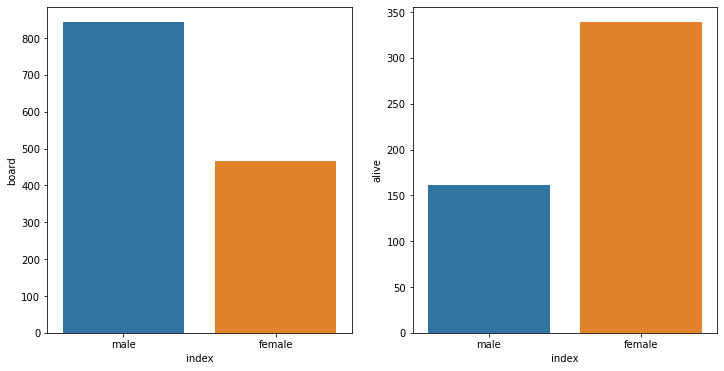

In [570]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.barplot('index', 'board', data=sex_df, ax=ax[0])
sns.barplot('index', 'alive', data=sex_df, ax=ax[1])

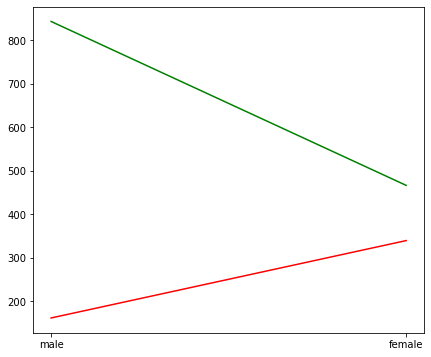

In [571]:
plt.figure(figsize=(7, 6))
plt.plot(sex_df['index'], sex_df['board'], color='g')
plt.plot(sex_df['index'], sex_df['alive'], color='r')
plt.show()

In [572]:
sex_df.set_index('index', inplace=True)#인덱스를 성별로 잡아서 그래프 그림.
sex_df

,alive,board
index,,
male,161,843
female,339,466


<Figure size 504x432 with 0 Axes>

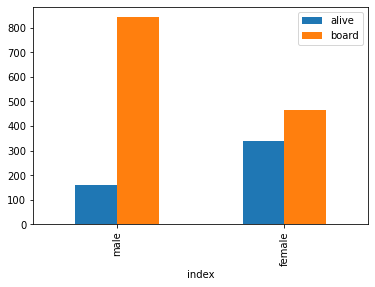

In [573]:
plt.figure(figsize=(7, 6))
sex_df.plot(kind='bar')
plt.show()#x축이 인덱스


In [574]:
raw_data[:3]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",children
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",children


In [575]:
del raw_data['name']
raw_data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",children
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",children
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [576]:
raw_data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",children
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",children
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [577]:
def func(x):
    if x == 'female':
        return 0
    else :
        return 1

In [578]:
raw_data['sex'] = raw_data['sex'].apply(func)
raw_data['sex'][:2]

0    0
1    1
Name: sex, dtype: int64

In [579]:
raw_data[:3]

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",children
2,1,0,0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",children


In [580]:
##age_cat'children':0, 'young':1, 'adult':2, 'old':3으로 바꿔서 df에 적용해보자.


In [581]:
# def func1(x):
#     if x == 'children':
#         return 0
#     elif x == 'young':
#         return 1
#     elif x == 'adult':
#         return 2
#     else:
#         return 3

## age_cat 'children' : 0, 'young : 1' ,'adult : 2','old : 3'
def func2(x):
    if x == 'children':
        return 0
    elif x == 'young':
        return 1
    elif x == 'adult':
        return 2
    else:
        return 3

In [582]:
raw_data['age_cat'] = raw_data['age_cat'].apply(func1)
raw_data['age_cat'][:10]

0    1
1    0
2    0
3    1
4    1
5    2
6    3
7    2
8    2
9    3
Name: age_cat, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [583]:
raw_data[:7]

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
5,1,1,1,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",2
6,1,1,0,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",3


In [584]:
raw_data['fare'].isnull().sum()

1

In [585]:
raw_data['fare'].fillna(raw_data['fare'].mean())


0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64

In [586]:
import warnings
warnings.filterwarnings(action='ignore')#임포트 해주면 그래프 그릴때 무시해도 되는 오류 안뜸!

In [587]:
#나이대별로 카운트
#나이대별 생사인원
raw_data.isnull().sum()#나이값 빈값 몇개인지

pclass          0
survived        0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
age_cat       263
dtype: int64

In [588]:
# sibsp: 함께 탑승한 형제자매나 배우자수
# parch: 함꼐 탑승한 부모의 수

In [589]:
#age가 결측치가 들어있는데
#어떻게 해야하는가?
#1.컬럼삭제: 너무 결측치가 많은 경우, 상관도가 다른 변수들에 비해서 많이 낮은 경우
#2.행삭제:결측치가 있는 행(instance)만 삭제, 행을 삭제해도 다른 instance가 많은 경우
#3. 다른 값으로 대체: 대체해도 크게 문제가 없을 때, 다른 instance가 많지 않은 경우
#   다른 값>> 숫자인 경우: 0(최소값),평균치(전체 데이터의 분포를 깨지 않을 목적일 때)
#             문자인 경우: 해당사항 없음, 값을 목록을 만들어서 랜덤하게 넣음.

In [590]:
#나이대별 카운트
#나이를 평균으로 대체
age_mean = raw_data['age'].mean()
print(age_mean)

#age컬럼 중에 nan을 평균으로 대체하자~
raw_data['age'].fillna(age_mean,inplace=True)
##nan이 있는지 없는지 확인!
raw_data['age'].isnull().sum()

29.8811345124283


0

In [591]:
raw_data.isnull()['age'].sum()
raw_data

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,0,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,1,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,0,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,1,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,0,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0
1305,3,0,0,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,1,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1307,3,0,1,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1


In [592]:
#raw_data['age'].mean()

In [593]:
# #나이가 nan인 값들을 전부 평균으로 바꿔줌.
# raw_data['age'] = raw_data['age'].fillna('29.8811345124283',inplace=True)#NaN값 자동으로 찾아서 값 넣어줌
# print(raw_data['age'].isnull().sum())#nan값 몇개인지 찍어보면 0나와야함.

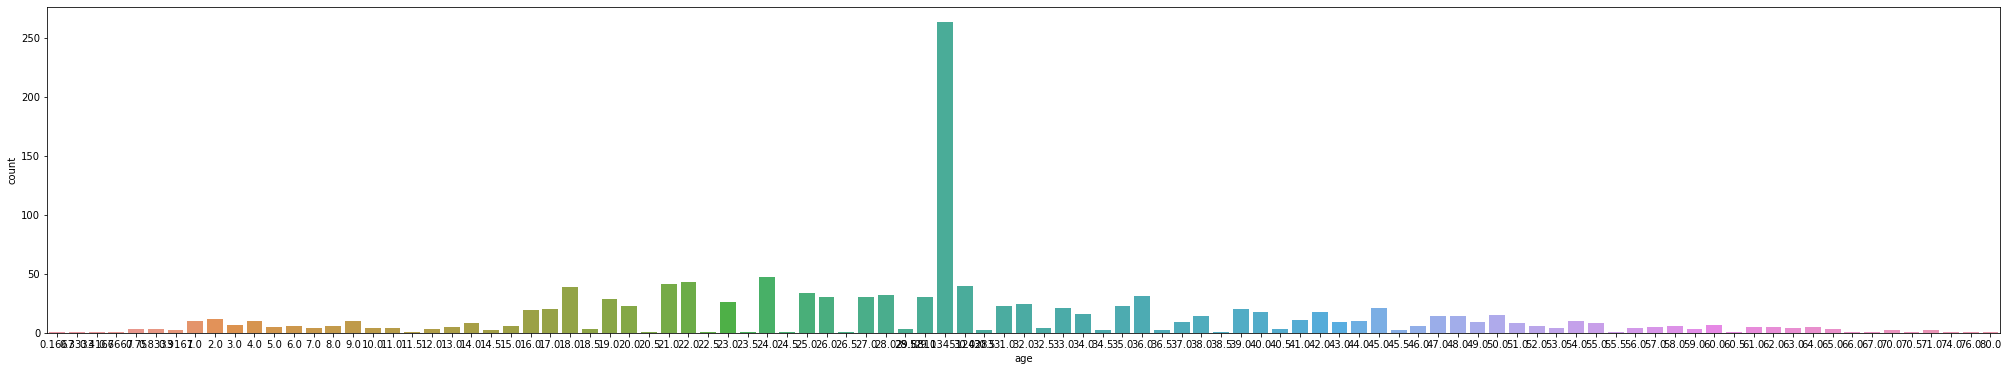

In [594]:
## age의 분포를 그려보세요.
plt.figure(figsize=(35,6))
sns.countplot('age', data=raw_data)
plt.show()

In [595]:
##나이대별 값의 범위가 너무 많아서 범위를 묶기로 함
raw_data['age_cat'] = pd.cut(raw_data['age'],
                            bins = [0, 20, 35, 55, 100],
                            include_lowest=True,
                            labels = ['children', 'young', 'adult', 'old'])
raw_data['age_cat'][:5]

0       young
1    children
2    children
3       young
4       young
Name: age_cat, dtype: category
Categories (4, object): ['children' < 'young' < 'adult' < 'old']

In [596]:
raw_data.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'age_cat'],
      dtype='object')

In [597]:
raw_data.head(2)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",children


In [598]:
#컬럼삭제: ticket,cabin,embarked,boat,body,dest
raw_data.drop(columns=['ticket','cabin','embarked','boat','home.dest'],inplace=True)

In [600]:
raw_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,body,age_cat
0,1,1,0,29.0000,0,0,211.3375,NaN,young
1,1,1,1,0.9167,1,2,151.5500,NaN,children
2,1,0,0,2.0000,1,2,151.5500,NaN,children
3,1,0,1,30.0000,1,2,151.5500,135.0,young
4,1,0,0,25.0000,1,2,151.5500,NaN,young


In [601]:
#age_cat별 평균을 구해보자.
rac =raw_data['age_cat'].value_counts()
rac

young       739
adult       263
children    248
old          59
Name: age_cat, dtype: int64

In [602]:
raw_data.groupby(by='age_cat').mean()

,pclass,survived,sex,age,sibsp,parch,fare,body
age_cat,,,,,,,,
children,2.568548,0.459677,0.560484,12.782930,0.991935,0.745968,29.025169,148.214286
young,2.442490,0.350474,0.671177,28.124139,0.381597,0.217862,26.865154,167.259259
adult,1.806084,0.410646,0.634981,43.699620,0.403042,0.509506,47.149810,150.307692
old,1.474576,0.322034,0.694915,62.161017,0.322034,0.406780,70.663722,177.785714


In [603]:
raw_data.head()

,pclass,survived,sex,age,sibsp,parch,fare,body,age_cat
0,1,1,0,29.0000,0,0,211.3375,NaN,young
1,1,1,1,0.9167,1,2,151.5500,NaN,children
2,1,0,0,2.0000,1,2,151.5500,NaN,children
3,1,0,1,30.0000,1,2,151.5500,135.0,young
4,1,0,0,25.0000,1,2,151.5500,NaN,young


In [695]:
##1. 먼저 공부를 많이 하고(훈련 데이터)
##2. 모의고사(75점이상)(검증용 데이터)
##=> data를 나누어보자!

##3. 실제로 예측하는 프로그램 사용할 예정-> 본시험!

In [696]:
from sklearn.model_selection import train_test_split#훈련용검증용 문제

In [697]:
df_data = raw_data[['pclass','sex', 'age', 'sibsp', 'parch', 'fare','survived']]
df_data

,pclass,sex,age,sibsp,parch,fare,survived
0,1,0,29.000000,0,0,211.3375,1
1,1,1,0.916700,1,2,151.5500,1
2,1,0,2.000000,1,2,151.5500,0
3,1,1,30.000000,1,2,151.5500,0
4,1,0,25.000000,1,2,151.5500,0
...,...,...,...,...,...,...,...
1304,3,0,14.500000,1,0,14.4542,0
1305,3,0,29.881135,1,0,14.4542,0
1306,3,1,26.500000,0,0,7.2250,0
1307,3,1,27.000000,0,0,7.2250,0


In [698]:
df_data[['pclass','sex', 'age', 'sibsp', 'parch', 'fare']]

,pclass,sex,age,sibsp,parch,fare
0,1,0,29.000000,0,0,211.3375
1,1,1,0.916700,1,2,151.5500
2,1,0,2.000000,1,2,151.5500
3,1,1,30.000000,1,2,151.5500
4,1,0,25.000000,1,2,151.5500
...,...,...,...,...,...,...
1304,3,0,14.500000,1,0,14.4542
1305,3,0,29.881135,1,0,14.4542
1306,3,1,26.500000,0,0,7.2250
1307,3,1,27.000000,0,0,7.2250


In [699]:
exam = df_data.iloc[:,:6]
exam

,pclass,sex,age,sibsp,parch,fare
0,1,0,29.000000,0,0,211.3375
1,1,1,0.916700,1,2,151.5500
2,1,0,2.000000,1,2,151.5500
3,1,1,30.000000,1,2,151.5500
4,1,0,25.000000,1,2,151.5500
...,...,...,...,...,...,...
1304,3,0,14.500000,1,0,14.4542
1305,3,0,29.881135,1,0,14.4542
1306,3,1,26.500000,0,0,7.2250
1307,3,1,27.000000,0,0,7.2250


In [700]:
target = df_data['survived']
target[:2]

0    1
1    1
Name: survived, dtype: int64

In [701]:
#예시
import random
random.seed(23)#seed를 주면 랜덤하게 뽑은 값이 23의 seed값이 되어 변하지 않는다. seed값을 다른거로 바꾸면 랜덤값도 바뀜.
for _ in range(10):
    print(random.randint(1,20),end=' ')

10 3 1 19 10 14 13 17 12 5 

In [702]:
#훈련용문제, 검증문제, 훈련답, 검증답 = train_test_split(exam,.....)이런식으로 구성.
#X_train, X_test, y_train, y_test
train_exam, test_exam, train_target,test_target = train_test_split(exam,#문제
                 target#정답
                 ,test_size=0.2#검증비율 20%,훈련비율 80%
                 ,random_state = 100#seed값을 주어 데이터 셋이 변경되지 않게 함.
                )


In [703]:
train_exam.info()#문제

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 16 to 792
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1047 non-null   int64  
 1   sex     1047 non-null   int64  
 2   age     1047 non-null   float64
 3   sibsp   1047 non-null   int64  
 4   parch   1047 non-null   int64  
 5   fare    1047 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 57.3 KB


In [704]:
train_target.count()#시리즈는 카운트함수 사용가능

1047

In [705]:
test_exam.info()#문제

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 173 to 22
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  262 non-null    int64  
 1   sex     262 non-null    int64  
 2   age     262 non-null    float64
 3   sibsp   262 non-null    int64  
 4   parch   262 non-null    int64  
 5   fare    261 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 14.3 KB


In [706]:
test_target.count()

262

In [707]:
##공부방법 선택: 공부방법이 정형화 된 것(알고리즘, 방법론, 모델링)
##공부방법론이 많으므로 컴퓨터가 학습할 방법론을 선택해서 알려주어야 함
##방법론은 클래스로 만들어져 있음.

In [708]:
train_exam.head()

,pclass,sex,age,sibsp,parch,fare
16,1,1,24.0,0,1,247.5208
538,2,1,30.0,0,0,12.7375
532,2,1,41.0,0,0,13.0000
285,1,1,67.0,1,0,221.7792
365,2,0,44.0,1,0,26.0000


In [709]:
train_exam.reset_index(inplace=True)

In [710]:
train_exam.head()

,index,pclass,sex,age,sibsp,parch,fare
0,16,1,1,24.0,0,1,247.5208
1,538,2,1,30.0,0,0,12.7375
2,532,2,1,41.0,0,0,13.0000
3,285,1,1,67.0,1,0,221.7792
4,365,2,0,44.0,1,0,26.0000


In [711]:
del train_exam['index']

In [712]:
train_exam.head()

,pclass,sex,age,sibsp,parch,fare
0,1,1,24.0,0,1,247.5208
1,2,1,30.0,0,0,12.7375
2,2,1,41.0,0,0,13.0000
3,1,1,67.0,1,0,221.7792
4,2,0,44.0,1,0,26.0000


In [713]:
test_exam.reset_index(inplace=True)
# train_target.reset_index(inplace=True)
# test_target.reset_index(inplace=True)

In [714]:
test_exam.head()

,index,pclass,sex,age,sibsp,parch,fare
0,173,1,1,32.500000,0,0,211.5000
1,843,3,1,29.881135,1,0,19.9667
2,996,3,1,33.000000,0,0,7.8958
3,992,3,0,30.500000,0,0,7.7500
4,12,1,0,24.000000,0,0,69.3000


In [715]:
del test_exam['index']

In [716]:
test_exam.head()

,pclass,sex,age,sibsp,parch,fare
0,1,1,32.500000,0,0,211.5000
1,3,1,29.881135,1,0,19.9667
2,3,1,33.000000,0,0,7.8958
3,3,0,30.500000,0,0,7.7500
4,1,0,24.000000,0,0,69.3000


In [717]:
train_target = train_target.reset_index()
test_target = test_target.reset_index()
test_target[:5]

,index,survived
0,173,0
1,843,0
2,996,0
3,992,0
4,12,1


In [718]:
del test_target['index']

In [719]:
del train_target['index']

In [720]:
test_target[:5]

,survived
0,0
1,0
2,0
3,0
4,1


In [721]:
train_target[:5]

,survived
0,0
1,1
2,0
3,0
4,0


In [722]:
from sklearn.tree import DecisionTreeClassifier

In [723]:
tree_clf = DecisionTreeClassifier(
        max_depth=3, random_state=42
)

In [744]:
tree_clf.fit(train_exam, train_target) #많이 공부!!

DecisionTreeClassifier(max_depth=3, random_state=42)

In [745]:
tree_clf.score(train_exam, train_target) #많이 공부한 것에 대한 점수

0.8194842406876791

In [746]:
train_exam.isnull().sum()

pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
dtype: int64

In [747]:
train_target.isnull().sum()

survived    0
dtype: int64

In [748]:
test_target.isnull().sum()

survived    0
dtype: int64

In [749]:
test_exam.isnull().sum()

pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
dtype: int64

In [777]:
test_exam['fare'] = raw_data['fare'].fillna(100)#NaN값 자동으로 찾아서 값 넣어줌
print(test_exam['fare'].isnull().sum())#nan값 몇개인지 찍어보면 0나와야함.

0


In [778]:
#fit가 공부하는 함수
tree_clf.fit(train_exam,train_target)#트레인 데이터에 대한 정확도

DecisionTreeClassifier(max_depth=3, random_state=42)

In [779]:
tree_clf.score(train_exam, train_target)

0.8194842406876791

In [780]:
from sklearn.metrics import accuracy_score

In [781]:
com_target = tree_clf.predict(test_exam)
com_target[:5]
#검증용 데이터로 검증
#검증해본 결과 test data에 대한 정확도!
#컴퓨터가 예측한 값들과 검증용 데이터의 정답과의 비교, 정확도를 계산할 예정!

array([0, 0, 0, 0, 1], dtype=int64)

In [782]:
accuracy_score(test_target, com_target) #문제를 푼 답과 정답지를 비교해서 채점!
#정확도를 계산,정답률

0.8206106870229007

In [783]:
com_target = tree_clf.predict(test_exam)

In [784]:
train_exam.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [793]:
drcaprio = [3,1,19,0,0,5]

In [794]:
result1 = tree_clf.predict_proba([drcaprio])
result1
#결과는 인덱스 순으로 보면 된다. 디카프리오는 죽음
#([[죽을확률,살확룰])

array([[0.87374749, 0.12625251]])

In [796]:
winslet = [1,0,17,1,1,100]

In [797]:
result2 = tree_clf.predict_proba([winslet])

result2#윈슬렛은 살음

array([[0.02255639, 0.97744361]])

In [798]:
def func3(r):
    if r[0][0] > r[0][1]:
        print('죽었을 가능성이 더 높다.')
        print('가능성 지수는 ', r[0][0]*100,'%')
    else:
        print('살았을 가능성이 더 높다.')
        print('가능성 지수는 ', r[0][1]*100,'%')

In [799]:
func3(result1)

죽었을 가능성이 더 높다.
가능성 지수는  87.374749498998 %


In [800]:
func3(result2)

살았을 가능성이 더 높다.
가능성 지수는  97.74436090225564 %


In [801]:
#한번에 여러값 넣어줄 수 있다.
result3 = tree_clf.predict_proba([drcaprio,winslet])#함수의 입력 타입은 [[]] 2차원 리스트가 되어야 함.
result3

array([[0.87374749, 0.12625251],
       [0.02255639, 0.97744361]])

In [802]:
print(tree_clf.feature_importances_)
#각ax1,bx2,cx3,dx4,ex5,fx6 라는 변수들에 대한 a,b,c,d,e,f값들(가중치)
#pclass	sex	age	sibsp	parch	fare이 x변수들의 값이다.

[0.17721694 0.68203511 0.04086365 0.05128195 0.         0.04860236]


In [803]:
#가중치가 거의 없었던 피쳐는 sibsp	parch	fare이다.
#가중치가 중간 정도 있었던 피처는 pclass
#가중치가 제일 컸던 피쳐는 sex

In [ ]:
# y = ax + b
# y = ax1 + cx2 + dx3 + ex4 + fx5 + gx6 + b
#    = a*1 + c*0 + d19 + ....
#    => a : 0.3
#    => c : 0.1
#    => d : 0.6

In [804]:
#가중치 그래프를 그려보자.

In [836]:
# 그래프로 그려보세요.
x = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
y = tree_clf.feature_importances_

In [824]:
result_df = pd.DataFrame({'feature' : x, 'weight' : y}, index=x)
result_df

,feature,weight
pclass,pclass,0.177217
sex,sex,0.682035
age,age,0.040864
sibsp,sibsp,0.051282
parch,parch,0.000000
fare,fare,0.048602


<AxesSubplot:xlabel='feature', ylabel='weight'>

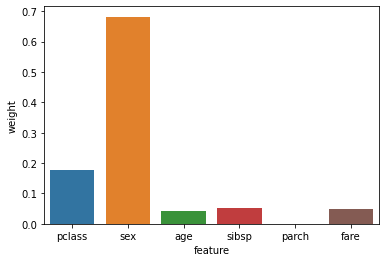

In [825]:
sns.barplot('feature', 'weight', data=result_df)
# weight: 가중치, 각 항목이 예측을 하는데 얼마나 영향력을 미쳤는가 정도

In [833]:
me = [2,1,10,0,0,200]

In [834]:
result4 = tree_clf.predict_proba([me])
result4

array([[0.87374749, 0.12625251]])

In [835]:
func3(result4)

죽었을 가능성이 더 높다.
가능성 지수는  87.374749498998 %


In [ ]:
#정제된 데이터 아이리스 데이터 셋 

In [838]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [839]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [840]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)